# Plot to verify agreement between best model and $\zeta$ Ophiuchi observable
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import * 
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [6]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P75_Z0.01/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/weak_wind/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/do_J_accretion/"
binary = folder+"/binary_to_donor_Hedepl/"
accretor = folder+"/accretor_to_TAMS/"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-3].replace('_','\_')
print(model_name)

zeta\_ophiuchi


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1217 but corresponding boolean dimension is 6878

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


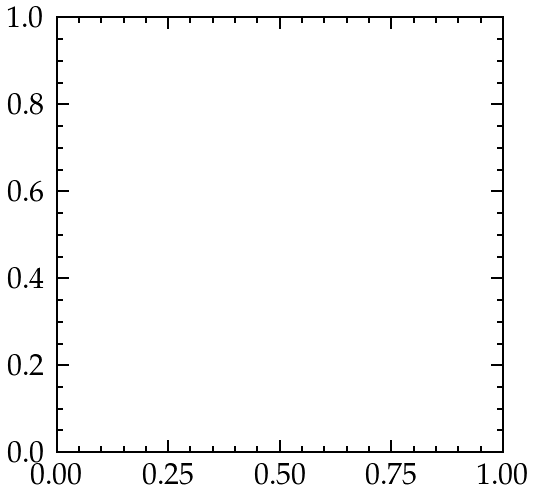

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1217 but corresponding boolean dimension is 6878

In [13]:
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

plot_HRD(ax, hfile1=hfile1, c="b", hfile2=hfile2, bfile=bfile)
zeta_oph_HRD(ax)
ax.plot(np.nan,np.nan, "ro",label=r"$\zeta \ \mathrm{Ophiuchi}$" )
ax.legend()
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
# plt.savefig("/mnt/home/mrenzo/TMP/HRD_doJaccretion.pdf")

No handles with labels found to put in legend.


No handles with labels found to put in legend.


Text(0, 0.5, '$\\log_{10}(L/L_\\odot)$')

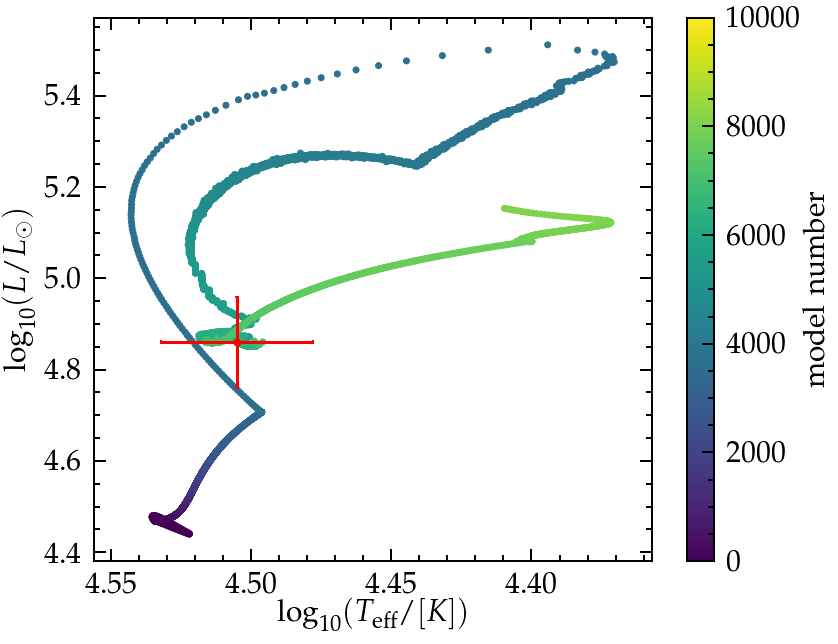

In [10]:
# analize MT
fig = plt.figure(figsize=(12.5,10))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

# plot_HRD(ax, hfile1=hfile1, c="#77CCCC", hfile2=hfile2, bfile=binary_exp_ov+"/binary_history.data", label=model_name)

#
vmin=0
vmax=10000

logL, logTeff = getlogLlogTeff(hfile1)
src, col = getSrcCol(hfile1)
modnum = src[:, col.index("model_number")]
omega_div_omega_crit = src[:, col.index('surf_avg_omega_div_omega_crit')]
surface_he4 =  src[:, col.index('surface_he4')]
center_he4 =  src[:, col.index('center_he4')]
ax.scatter(logTeff, logL, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
# j=4000
#ax.plot(logTeff[j], logL[j], c='k', mew=3, marker='x', ms=40, zorder=10)
# binary ------------------------------------------------------------------------------------
# src, col = getSrcCol(bfile)
# modnum = src[:, col.index("model_number")]
# rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
# ind = rl_relative_gap_1 > 0
# ax.scatter(logTeff[ind], logL[ind], c=modnum[ind], s=300, zorder=3, vmin=0, vmax=12000)
# --------------------------------------------------------------------------------------------
logL, logTeff = getlogLlogTeff(hfile2)
src, col = getSrcCol(hfile2)
modnum = src[:, col.index("model_number")]
omega_div_omega_crit = src[:, col.index('surf_avg_omega_div_omega_crit')]
surface_he4 =  src[:, col.index('surface_he4')]
center_he4 =  src[:, col.index('center_he4')]
p = ax.scatter(logTeff, logL, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
# fig.colorbar(p, label="$\omega/\omega_\mathrm{crit}$")
# fig.colorbar(p, label="$\mathrm{surface\ mass\ fraction}\ ^4\mathrm{He}$")
fig.colorbar(p, label="$\mathrm{model\ number}$")
ax.legend(fontsize=20)
# ax.set_title(model_name, size=30)
zeta_oph_HRD(ax)
ax.legend()
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
# fig.savefig("/mnt/home/mrenzo/TMP/HRD_.pdf")

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


(2.224744275685287, 7.114115791552815)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


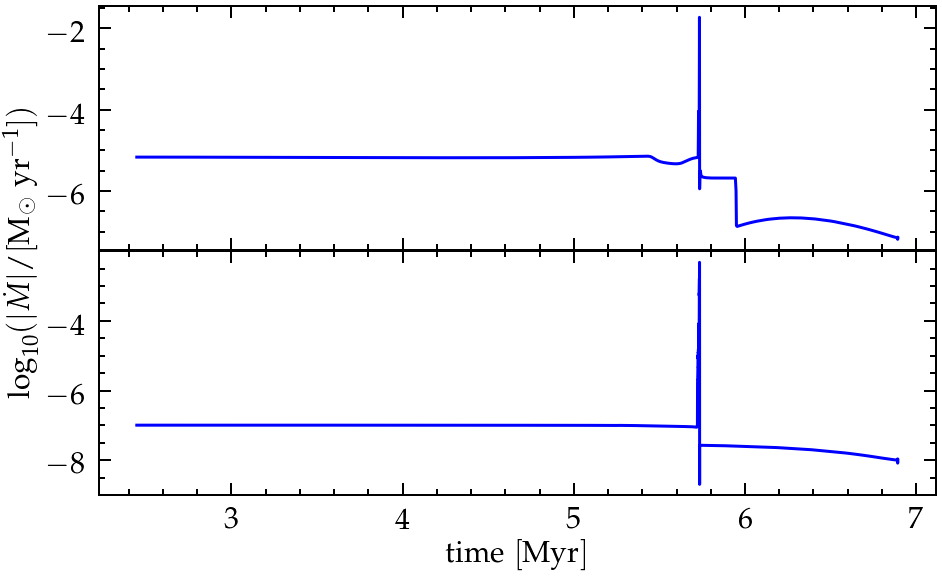

In [25]:
# mass transfer rate
fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[50:,:])
bx = fig.add_subplot(gs[:50,:])


src, col = getSrcCol(bfile)
lg_mtransfer_rate = src[:, col.index('lg_mtransfer_rate')]
lg_mstar_dot_1 = src[:, col.index('lg_mstar_dot_1')]
lg_mstar_dot_2 = src[:, col.index('lg_mstar_dot_2')]
lg_system_mdot_1 = src[:, col.index('lg_system_mdot_1')]
lg_system_mdot_2 = src[:, col.index('lg_system_mdot_2')]
lg_wind_mdot_1 = src[:, col.index('lg_wind_mdot_1')]
lg_wind_mdot_2 = src[:, col.index('lg_wind_mdot_2')]
t = src[:, col.index("age")]
t = np.log10(t[-1]-t)

ax.plot(t, lg_mstar_dot_2, c='b')
bx.plot(t, lg_mstar_dot_1, c='b')

ax.set_ylabel(r"$\log_{10}(|\dot{M}|/\mathrm{[M_\odot \ yr^{-1}]})$",  horizontalalignment='center', y=1.)
ax.set_xlabel(r"$\log_10(t_\mathrm{end}-t \ [yr]})$")
bx.set_xlabel("")
bx.set_xticklabels([])
ax.set_xlim(xmin=5.5)
bx.set_xlim(ax.get_xlim())

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.canvas.print_figure(bytes_io, **kw)


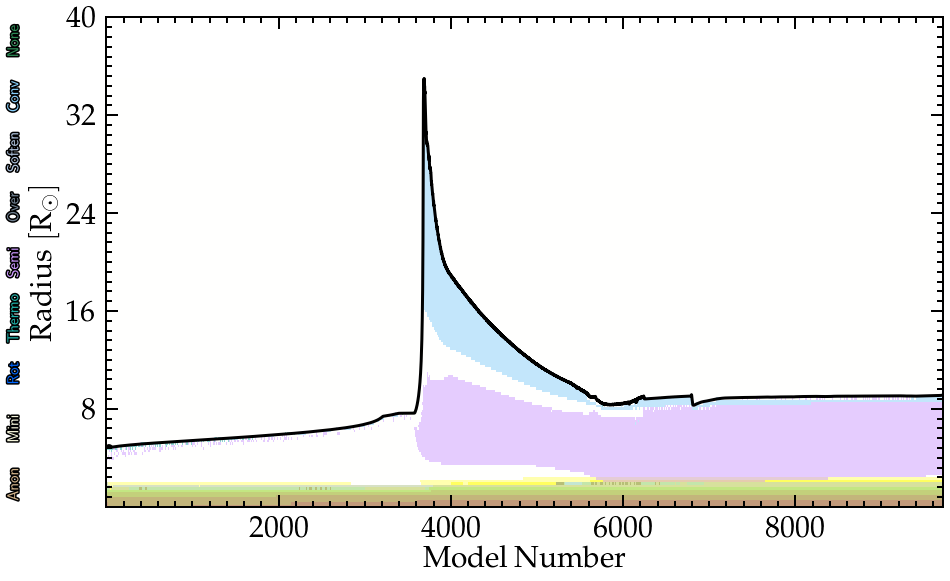

In [66]:
# Kippenhahn diagram
fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

x = 'model_number' # 'star_age' # 
y =  'radius' # 'mass' #

mmm.loadHistory(f=binary+'/LOGS2')
ppp.plotKip3(mmm, fig=fig, ax=ax,
             xaxis=x,
             yaxis=y,
             reloadHistory=False,
             show_mass_loc=False,
             show_mix_labels=True,
             show=False,
             mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
             # age_lookback=True,
             age_log=False,
             zone_frac = 10, # 0.2,
             colorbar=False,
             cmin=-12.45, cmax=12.5)

if y=='radius':
    ax.set_ylim(ymax=40)

# plt.savefig("/mnt/home/mrenzo/TMP/kipp_mass.pdf")

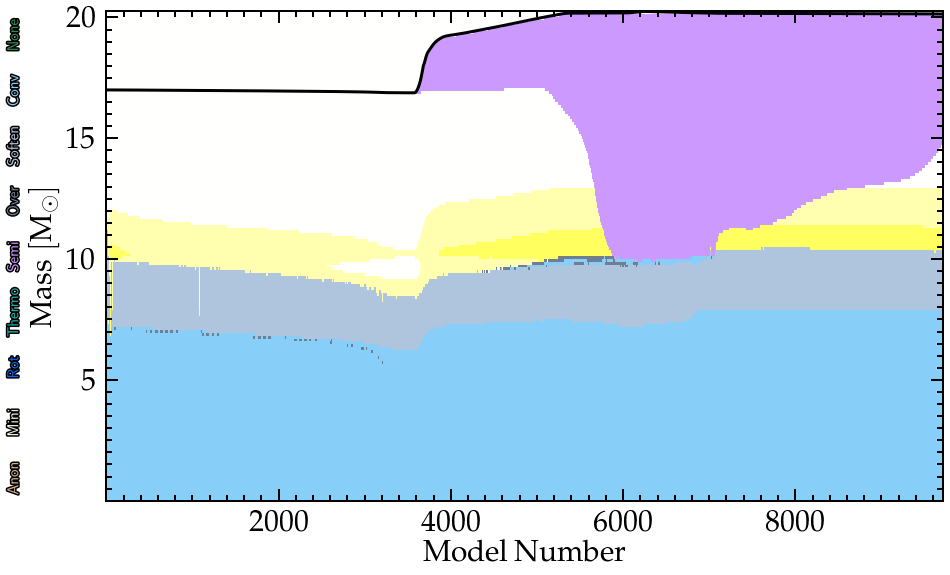

In [69]:
fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

x = 'model_number' # 'star_age' # 
y = 'mass' # 'radius' # 

mmm.loadHistory(f=binary+'/LOGS2')
ppp.plotKip3(mmm, fig=fig, ax=ax,
             xaxis=x,
             yaxis=y,
             reloadHistory=False,
             show_mass_loc=False,
             show_mix_labels=True,
             show=False,
             mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
             # age_lookback=True,
             age_log=False,
             zone_frac = 10, # 0.2,
             colorbar=False,
             cmin=-12.45, cmax=12.5)

if y=='radius':
    ax.set_ylim(ymax=40)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


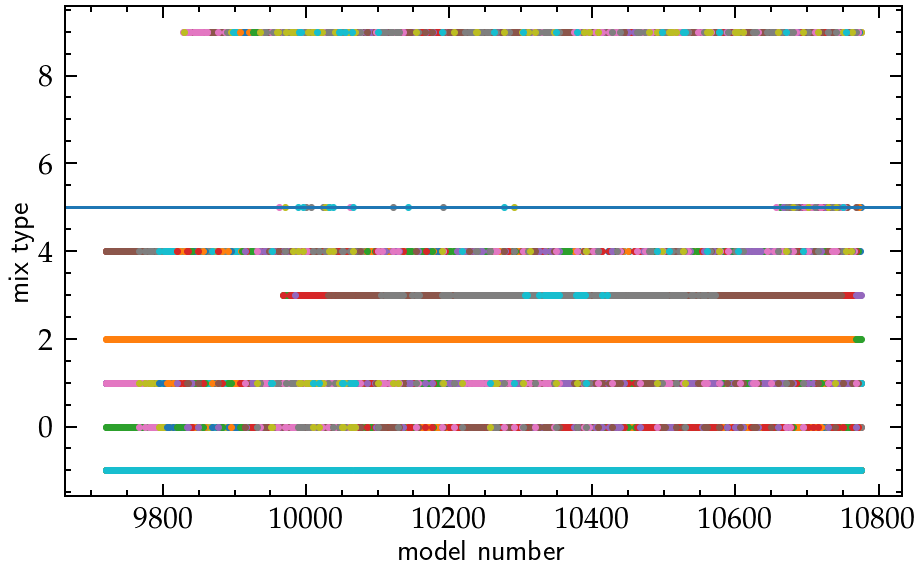

In [79]:
src, col = getSrcCol(hfile2)
mix_type1 = src[:, col.index("mix_type_1")]
mix_type2 = src[:, col.index("mix_type_2")]
mix_type3 = src[:, col.index("mix_type_3")]
mix_type4 = src[:, col.index("mix_type_4")]
mix_type5 = src[:, col.index("mix_type_5")]
mix_type6 = src[:, col.index("mix_type_6")]
mix_type7 = src[:, col.index("mix_type_7")]
mix_type8 = src[:, col.index("mix_type_8")]
mix_type9 = src[:, col.index("mix_type_9")]
mix_type10 = src[:, col.index("mix_type_10")]
mix_type11 = src[:, col.index("mix_type_11")]
mix_type12 = src[:, col.index("mix_type_12")]
mix_type13 = src[:, col.index("mix_type_13")]
mix_type14 = src[:, col.index("mix_type_14")]
mix_type15 = src[:, col.index("mix_type_15")]
mix_type16 = src[:, col.index("mix_type_16")]
mix_type17 = src[:, col.index("mix_type_17")]
mix_type18 = src[:, col.index("mix_type_18")]
mix_type19 = src[:, col.index("mix_type_19")]
mix_type20 = src[:, col.index("mix_type_20")]
t = src[:, col.index("model_number")]

fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])


ax.scatter(t,mix_type1)
ax.scatter(t,mix_type2)
ax.scatter(t,mix_type3)
ax.scatter(t,mix_type4)
ax.scatter(t,mix_type5)
ax.scatter(t,mix_type6)
ax.scatter(t,mix_type7)
ax.scatter(t,mix_type8)
ax.scatter(t,mix_type9)
ax.scatter(t,mix_type10)
ax.scatter(t,mix_type11)
ax.scatter(t,mix_type12)
ax.scatter(t,mix_type13)
ax.scatter(t,mix_type14)
ax.scatter(t,mix_type15)
ax.scatter(t,mix_type16)
ax.scatter(t,mix_type17)
ax.scatter(t,mix_type18)
ax.scatter(t,mix_type19)
ax.scatter(t,mix_type20)

ax.set_xlabel(r"model number")
ax.set_ylabel(r"mix type")
ax.axhline(5)



0.67829 0.31181 0.00144 0.00125 0.00416


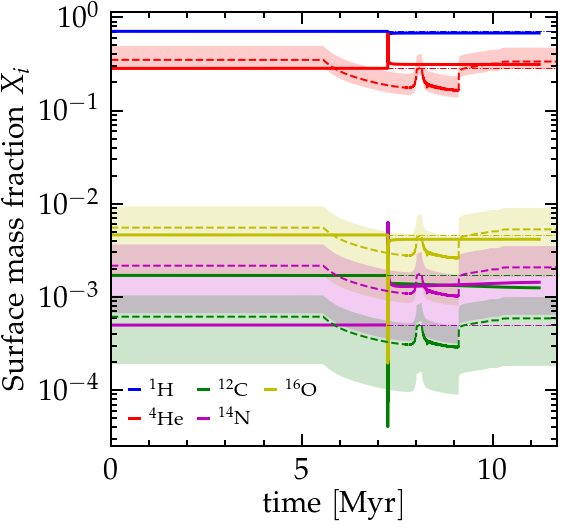

In [11]:
# chemical composition
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

final_h1, final_he4, final_n14, final_c12, final_o16 = plot_surface_abundances(hfile1, hfile2, ax=ax)
ax.legend(handlelength=0.5, columnspacing=0.75, handletextpad=0.5, ncol=3, loc="best", fontsize=20)
ax.set_yscale('log')
ax.set_xlim(0,11.7)
print(f"{final_h1:0.5f}", f"{final_he4:0.5f}", f"{final_n14:0.5f}", f"{final_c12:0.5f}", f"{final_o16:0.5f}")
# plt.savefig("/mnt/home/mrenzo/TMP/composition_zeta_doJaccretion.pdf")

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


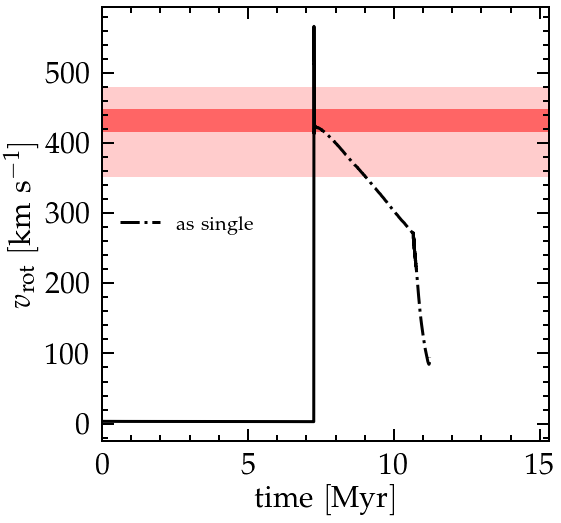

In [12]:
# surface rotation rate
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

plot_surface_rotation_time(ax, hfile1, c='k', hfile2=hfile2) #, label="Z=0.01")
# t, v = get_surface_rotation_time(hfile1)
# src, col = getSrcCol(hfile1)
# modnum = src[:, col.index("model_number")]
# ax.scatter(t, v, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
# t, v = get_surface_rotation_time(hfile2)
# src, col = getSrcCol(hfile2)
# modnum = src[:, col.index("model_number")]

# ax.scatter(t, v, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
ax.plot(np.nan, np.nan,c='k', ls="-.", label="$\mathrm{as\ single}$")
# overplot observational range
vsini, err_vsini = get_zeta_oph_vsini()
ax.set_xlim(0, 15.3)
xmin, xmax = ax.get_xlim()
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-5*err_vsini], [vsini+3*err_vsini], facecolor='r', alpha=0.2, zorder=1)
ax.legend(loc="center left", fontsize=20)
ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
# ax.set_xlim(xmin=8)
# ax.set_ylim(ymin=200)
ax.set_ylabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")
plt.savefig("/mnt/home/mrenzo/TMP/zeta_rot.pdf")

/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P75_Z0.01//binary_to_donor_Hedepl/
... Binary file does not yet exist


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


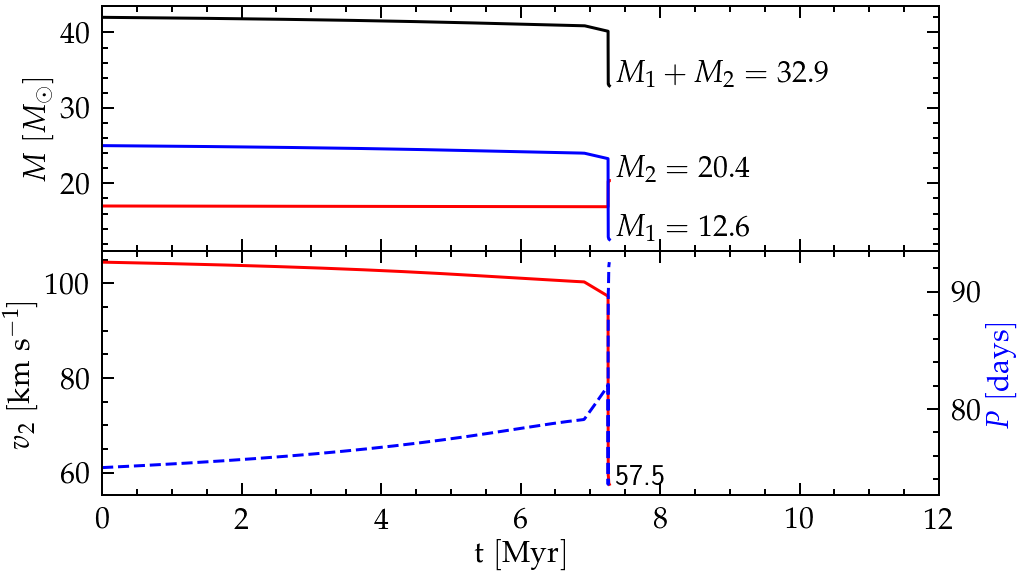

In [7]:
# orbital evolution
MassVelocityEvolution(binary, figName="")

Text(0, 0.5, '$\\log_{10}(g/\\mathrm{cm\\ s^{-2}})$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


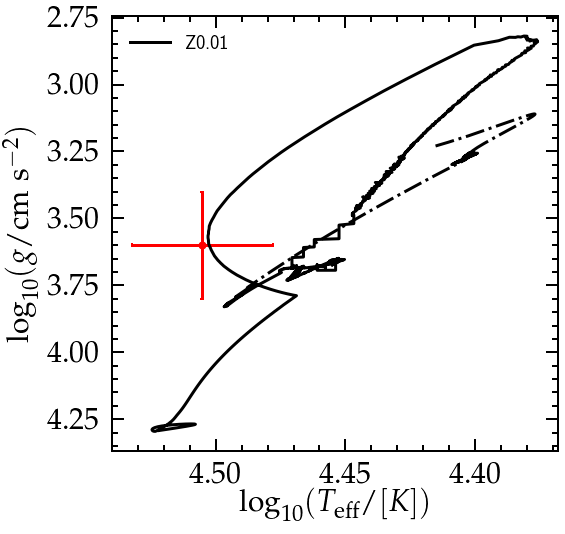

In [13]:
# spectroscopic HRD
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])
plot_spectroscopic_HRD(ax, hfile1, c='k', hfile2=hfile2, label=model_name)
zeta_oph_spectroscopicHRD(ax)
ax.legend(fontsize=20)    
ax.invert_xaxis()
ax.invert_yaxis()    
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(g/\mathrm{cm\ s^{-2}})$")
